In [1]:
import quandl
import cvxopt
import pandas as pd
import numpy as np
from bokeh.palettes import Set1
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import Range1d, HoverTool, CrosshairTool, NumeralTickFormatter
from bokeh.layouts import row, gridplot
from bokeh.models.callbacks import CustomJS
from bokeh.transform import dodge
from bokeh.io import push_notebook, output_notebook
from datetime import datetime, timedelta
from math import sqrt, log, pi
output_notebook()


import cvxopt
from gurobipy import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import Range1d, HoverTool, NumeralTickFormatter
output_notebook()
import pandas as pd
import yfinance as yf
import datetime as dt
import bokeh.palettes
from bokeh.io import output_file, show, save

Loading BokehJS ...

Loading BokehJS ...

In [2]:
start = "2018-01-01"
end = "2019-12-30"
#end = dt.datetime.today()
title = "Stock Analysis"
rf = 0.0325
mkt_ret = 0.07

In [3]:
stocks = pd.read_excel("C:\\Users\\Meekey\\Documents\\DeepLearning\\All_Stocks4.xlsx")
stocks = stocks.Symbol.tolist()

#data_exp = 100
cl_price = pd.DataFrame()
for ticker in stocks:
        print("Downloading {}".format(ticker))
        cl_price[ticker] = yf.download(ticker, start, end, actions = False)["Adj Close"]
cl_price.isna().any()
stk_price = cl_price.copy()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
cl_price.shape

(486, 20)

In [5]:
stk_price.to_csv("C:\\Temp\\temp.csv")

cl_price = pd.read_csv("C:\\Temp\\temp.csv")
cl_price = cl_price.dropna()

cl_price.Date = pd.to_datetime(cl_price.Date)
cl_price = cl_price.set_index('Date').resample('M').mean()
cl_price.shape

(24, 20)

In [6]:
pd.set_option('display.max_row', None)
cl_price.shape

(24, 20)

In [7]:
cl_price

,^BSESN,TATACONSUM.NS,HAVELLS.NS,VIPIND.NS,GNA.NS,PAGEIND.NS,UNIONBANK.NS,DENORA.NS,ORIENTBELL.NS,TCPLPACK.NS,RADICO.NS,POLYMED.NS,SHALPAINTS.NS,EXIDEIND.NS,CIGNITITEC.NS,GUFICBIO.NS,AUTOIND.NS,PRAKASH.NS,CENTURYPLY.NS,DEEPAKFERT.NS
Date,,,,,,,,,,,,,,,,,,,,
2018-01-31,34989.415305,308.378381,542.539332,347.918733,432.624945,22389.495384,141.475001,293.170031,318.718898,667.118491,333.786452,263.782349,152.326091,215.865936,281.284090,128.075901,104.902273,191.585530,334.055144,374.789499
2018-02-28,34287.038446,272.614895,495.911954,335.782071,414.601959,21082.599404,117.700000,492.795858,294.545955,609.373490,339.152220,244.295436,133.956103,201.588739,267.028947,121.035316,86.984211,179.418557,311.955642,324.085831
2018-03-31,33323.319696,266.846808,489.762904,312.336982,420.394735,20730.599609,96.202631,451.669451,267.700562,581.603387,328.337902,245.353108,114.655053,205.262581,254.794736,112.191951,70.410526,152.022324,316.103875,286.347924
2018-04-30,34145.676711,278.810152,522.157835,373.958906,506.922481,23627.949870,96.845238,446.102526,292.046291,553.385408,387.041097,251.744093,116.223285,230.765422,243.907143,123.817962,77.566667,169.839566,333.648573,323.287535
2018-05-31,35079.555930,264.092911,528.500232,394.364875,505.474260,23264.613991,89.047727,410.714306,291.054984,519.190109,416.883620,236.937861,104.239655,245.615340,240.895454,142.518075,77.704545,155.404445,281.476939,300.394018
2018-06-30,35405.144903,264.113544,527.440992,419.843006,472.579094,25489.290737,88.611905,287.874503,268.349204,473.450579,398.793652,210.419280,91.753209,242.904476,301.011907,123.501814,70.045238,139.851353,253.373152,257.532194
2018-07-31,36406.377486,252.805520,566.590229,424.657736,422.572869,27884.968484,80.472727,282.089963,251.902659,443.894229,376.639576,212.410226,93.323926,257.092274,402.450000,118.028771,64.656817,119.500259,236.079360,239.751132
2018-08-31,38061.525298,235.027584,677.167931,564.192716,377.180583,32198.733631,87.473810,319.364477,226.241573,426.982926,433.115367,220.987399,94.178300,277.235200,415.404765,121.963863,65.359524,123.576537,226.303073,239.964218
2018-09-30,37397.496962,227.944785,640.636278,517.189682,371.380573,32352.980143,78.213889,272.417661,206.032275,414.381982,409.879823,211.727910,83.965389,261.279568,389.391666,124.314964,61.844444,120.520853,197.090507,215.276027


In [8]:
temp  = cl_price.tail(1).copy()
temp = temp.drop(['^BSESN'], axis = 1)
#temp = temp.drop(['Date'], axis = 1)
temp.T

Date,2019-12-31
TATACONSUM.NS,314.835637
HAVELLS.NS,648.826611
VIPIND.NS,421.979796
GNA.NS,253.432499
PAGEIND.NS,22023.056445
UNIONBANK.NS,57.225000
DENORA.NS,198.700002
ORIENTBELL.NS,131.177500
TCPLPACK.NS,256.742319
RADICO.NS,303.696663


In [9]:
cl_price = cl_price.dropna()
cl_price.shape

(24, 20)

In [10]:
stocks = pd.read_excel("C:\\Users\\Meekey\\Documents\\DeepLearning\\All_Stocks4.xlsx")
stocks = stocks.Symbol.tolist()
stk_beta ={}
for ticker in stocks[1:]:
    tkr = yf.Ticker(ticker)
    print("Downloading beta for {}".format(ticker))
    stk_beta[ticker] = tkr.info['beta']
stk_beta

{'TATACONSUM.NS': 0.77078,
 'HAVELLS.NS': 0.765323,
 'VIPIND.NS': 0.8261959999999999,
 'GNA.NS': 1.066924,
 'PAGEIND.NS': 0.70403,
 'UNIONBANK.NS': 1.096977,
 'DENORA.NS': 1.435768,
 'ORIENTBELL.NS': 1.49874,
 'TCPLPACK.NS': 1.375314,
 'RADICO.NS': 0.784214,
 'POLYMED.NS': 0.418975,
 'SHALPAINTS.NS': 0.88497,
 'EXIDEIND.NS': 0.536104,
 'CIGNITITEC.NS': 0.505877,
 'GUFICBIO.NS': 1.236356,
 'AUTOIND.NS': 1.740554,
 'PRAKASH.NS': 2.449202,
 'CENTURYPLY.NS': 1.152812,
 'DEEPAKFERT.NS': 1.132661}

In [11]:
cl_price.shape

(24, 20)

In [12]:
#save BSE in market price and rest in cl_price
market_price = cl_price[stocks[0]]
cl_price = cl_price.drop(stocks[0], axis = 1)

In [13]:
cl_price_ret = cl_price.pct_change()
cl_price_ret = cl_price_ret.dropna()
#cl_price_ret.plot(figsize = (16,5), title = "Monthly Stock Return")

In [14]:
cum_cl_price_ret = (cl_price_ret + 1).cumprod()
#cum_cl_price_ret.plot(figsize = (16,5))
cum_cl_price_ret.tail()

,TATACONSUM.NS,HAVELLS.NS,VIPIND.NS,GNA.NS,PAGEIND.NS,UNIONBANK.NS,DENORA.NS,ORIENTBELL.NS,TCPLPACK.NS,RADICO.NS,POLYMED.NS,SHALPAINTS.NS,EXIDEIND.NS,CIGNITITEC.NS,GUFICBIO.NS,AUTOIND.NS,PRAKASH.NS,CENTURYPLY.NS,DEEPAKFERT.NS
Date,,,,,,,,,,,,,,,,,,,
2019-08-31,0.860750,1.199784,1.119071,0.518624,0.803824,0.442092,0.763286,0.380923,0.413616,0.921464,0.666356,0.465843,0.807993,0.952329,0.451401,0.342652,0.212521,0.375707,0.213303
2019-09-30,0.859173,1.251083,1.250607,0.588038,0.889151,0.402228,0.729844,0.413200,0.426685,0.919915,0.788826,0.520646,0.830322,1.081684,0.532120,0.363998,0.271912,0.431270,0.238695
2019-10-31,0.895904,1.238454,1.329394,0.557290,0.980564,0.366719,0.699881,0.380471,0.388641,0.908294,0.783579,0.577414,0.835428,1.092668,0.555315,0.274591,0.230528,0.479743,0.245843
2019-11-30,0.974182,1.239460,1.268696,0.622941,1.027949,0.404612,0.751825,0.390187,0.413686,0.941668,0.788906,0.611796,0.866199,1.106150,0.534339,0.241248,0.255225,0.506780,0.257987
2019-12-31,1.020939,1.195907,1.212869,0.585802,0.983633,0.404488,0.677764,0.411577,0.384853,0.909853,0.789320,0.538532,0.835976,1.096916,0.483631,0.250185,0.233603,0.489247,0.238225


In [15]:
market_ret = market_price.pct_change().dropna()
cum_market_ret = (1  + market_ret).cumprod()
cum_market_ret.tail()

Date
2019-08-31    1.061731
2019-09-30    1.073040
2019-10-31    1.106480
2019-11-30    1.157867
2019-12-31    1.173054
Freq: M, Name: ^BSESN, dtype: float64

In [16]:
len(cum_cl_price_ret)

23

In [17]:
t = len(cum_cl_price_ret)/256
t

0.08984375

In [18]:
stk_annual_growth = (cum_cl_price_ret.tail(1))**(1/t) - 1
mkt_annual_growth = (cum_market_ret[-1])**(1/t) - 1
#stk_annual_growth['market'] = mkt_annual_growth

mkt_annual_growth

4.909365445030641

In [19]:
stk_annual_growth.T

Date,2019-12-31
TATACONSUM.NS,0.259428
HAVELLS.NS,6.324975
VIPIND.NS,7.568100
GNA.NS,-0.997400
PAGEIND.NS,-0.167793
UNIONBANK.NS,-0.999958
DENORA.NS,-0.986823
ORIENTBELL.NS,-0.999949
TCPLPACK.NS,-0.999976
RADICO.NS,-0.650592


import seaborn as sns
from scipy import stats

#Calculate Stock Beta
stk_beta ={}
stk_ex_ret ={}
rf = 0.05
def calc_stock_beta(mkt_ret, stock_ret, rf):
#    mr = mkt_ret.copy()
#    sr = stock_ret.copy()
    for ticker in stock_ret:
        stock_beta, stk_alpha = stats.linregress(mkt_ret, 
                               stock_ret[ticker])[0:2]
        stk_beta[ticker] = stock_beta
        #stk_ex_ret[ticker] = rf + stock_beta*(mkt_ret[-1] - rf)
        #print(mkt_ret[-1])
        stk_ex_ret[ticker] = rf + stock_beta*(mkt_ret[-1] - rf)
        #plt.barh(ticker, round(stock_beta,2))

calc_stock_beta(market_ret, cl_price_ret, rf)

stocks = pd.read_excel("C:\\Users\\Meekey\\Documents\\DeepLearning\\All_Stocks4.xlsx")
stocks = stocks.Symbol.tolist()


stk_beta ={}
for ticker in stocks[1:]:
    tkr = yf.Ticker(ticker)
    print("Downloading beta for {}".format(ticker))
    stk_beta[ticker] = tkr.info['beta']
stk_beta

In [20]:
expected_stock_ret = {}
for ticker in stk_beta:
    expected_stock_ret[ticker] = rf + stk_beta[ticker] * (mkt_ret - rf)

expected_stock_ret

{'TATACONSUM.NS': 0.06140425000000001,
 'HAVELLS.NS': 0.0611996125,
 'VIPIND.NS': 0.06348235,
 'GNA.NS': 0.07250965000000001,
 'PAGEIND.NS': 0.058901125000000006,
 'UNIONBANK.NS': 0.07363663750000002,
 'DENORA.NS': 0.08634130000000001,
 'ORIENTBELL.NS': 0.08870275000000001,
 'TCPLPACK.NS': 0.084074275,
 'RADICO.NS': 0.061908025000000005,
 'POLYMED.NS': 0.0482115625,
 'SHALPAINTS.NS': 0.065686375,
 'EXIDEIND.NS': 0.05260390000000001,
 'CIGNITITEC.NS': 0.051470387500000006,
 'GUFICBIO.NS': 0.07886335,
 'AUTOIND.NS': 0.097770775,
 'PRAKASH.NS': 0.12434507500000001,
 'CENTURYPLY.NS': 0.07573045,
 'DEEPAKFERT.NS': 0.0749747875}

In [21]:
np.sum(cl_price_ret.mean())/len(cl_price_ret.columns)

-0.017947084033707407

In [22]:
cl_price_ret.shape

(23, 19)

In [23]:
stk_annual_growth.shape

(1, 19)

In [24]:
stats = pd.DataFrame()
def performance_statistics(stk_grwth, data):
#    change = (data /  data.shift()- 1).iloc[1:]
#    stats = pd.concat((change.mean(), change.std(), data.iloc[-1] / data.iloc[0] - 1.0),axis=1)
    #print(data.mean(), data.std(), (data + 1).prod()-1)
    stats = pd.concat((stk_grwth, data.std()*sqrt(12), (data + 1).prod()-1),axis=1)
    stats.columns = ['Mean return', 'Standard deviation', 'Total return']
    return stats
stats = performance_statistics(stk_annual_growth.T, cl_price_ret)
#stats = stats
stats

,Mean return,Standard deviation,Total return
TATACONSUM.NS,0.259428,0.219664,0.020939
HAVELLS.NS,6.324975,0.233076,0.195907
VIPIND.NS,7.568100,0.397336,0.212869
GNA.NS,-0.997400,0.326001,-0.414198
PAGEIND.NS,-0.167793,0.280889,-0.016367
UNIONBANK.NS,-0.999958,0.392765,-0.595512
DENORA.NS,-0.986823,0.626722,-0.322236
ORIENTBELL.NS,-0.999949,0.262564,-0.588423
TCPLPACK.NS,-0.999976,0.181591,-0.615147
RADICO.NS,-0.650592,0.305583,-0.090147


weights = np.random.random_sample((len(stocks)-1))
weights = weights/np.sum(weights)
#weights = [0.1, 0.1, 0.15, 0.35, 0.1, 0.1, 0.1]
#weights = np.ndarray[(0.1, 0.1, 0.15, 0.35, 0.1, 0.1, 0.1)]
weights

In [25]:
weights = 1
weights = np.repeat(a= weights/len(cl_price_ret.columns) , repeats = len(cl_price_ret.columns))
weights

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [26]:
expected_stock_ret

{'TATACONSUM.NS': 0.06140425000000001,
 'HAVELLS.NS': 0.0611996125,
 'VIPIND.NS': 0.06348235,
 'GNA.NS': 0.07250965000000001,
 'PAGEIND.NS': 0.058901125000000006,
 'UNIONBANK.NS': 0.07363663750000002,
 'DENORA.NS': 0.08634130000000001,
 'ORIENTBELL.NS': 0.08870275000000001,
 'TCPLPACK.NS': 0.084074275,
 'RADICO.NS': 0.061908025000000005,
 'POLYMED.NS': 0.0482115625,
 'SHALPAINTS.NS': 0.065686375,
 'EXIDEIND.NS': 0.05260390000000001,
 'CIGNITITEC.NS': 0.051470387500000006,
 'GUFICBIO.NS': 0.07886335,
 'AUTOIND.NS': 0.097770775,
 'PRAKASH.NS': 0.12434507500000001,
 'CENTURYPLY.NS': 0.07573045,
 'DEEPAKFERT.NS': 0.0749747875}

In [27]:
i=0
annualized_return=0
weighted_expected_stock_return ={}
for x, y in expected_stock_ret.items():
    weighted_expected_stock_return[x] = np.sum(y * weights[i])
    annualized_return = annualized_return + (np.sum(y * weights[i]))
    i += 1
    #temp[x] = np.sum(y * weights[i])
    
annualized_return

0.07272719144736843

In [28]:
matrix_cov_stock_ret = (cl_price_ret.cov()) * 12
matrix_cov_stock_ret

,TATACONSUM.NS,HAVELLS.NS,VIPIND.NS,GNA.NS,PAGEIND.NS,UNIONBANK.NS,DENORA.NS,ORIENTBELL.NS,TCPLPACK.NS,RADICO.NS,POLYMED.NS,SHALPAINTS.NS,EXIDEIND.NS,CIGNITITEC.NS,GUFICBIO.NS,AUTOIND.NS,PRAKASH.NS,CENTURYPLY.NS,DEEPAKFERT.NS
TATACONSUM.NS,0.048252,-0.000978,0.000195,0.023307,0.001128,0.027215,-0.043059,0.018544,0.008282,-0.016080,-0.000949,0.031036,0.006375,-0.002008,0.006698,0.013722,0.010051,0.023278,0.027058
HAVELLS.NS,-0.000978,0.054324,0.074470,0.018377,0.035628,0.047953,-0.003917,0.016145,0.017320,0.032017,0.014749,0.048418,0.029379,0.036365,0.030382,0.033361,0.043128,0.029335,0.036912
VIPIND.NS,0.000195,0.074470,0.157876,0.042344,0.069004,0.068435,0.019725,0.037066,0.017610,0.078314,0.025085,0.081367,0.054190,0.054979,0.074447,0.043854,0.067743,0.048222,0.059137
GNA.NS,0.023307,0.018377,0.042344,0.106277,0.031873,0.058991,0.028310,0.067994,0.039240,0.046182,0.024053,0.066909,0.036950,0.011951,0.063368,0.042432,0.092595,0.065752,0.072904
PAGEIND.NS,0.001128,0.035628,0.069004,0.031873,0.078899,0.026105,-0.006309,0.018829,0.005965,0.031170,0.016803,0.044452,0.035836,0.059275,0.046767,0.008537,0.063057,0.039487,0.059236
UNIONBANK.NS,0.027215,0.047953,0.068435,0.058991,0.026105,0.154265,0.023155,0.061155,0.048983,0.049645,0.006790,0.090140,0.030530,0.039573,0.031859,0.071563,0.064315,0.052384,0.039766
DENORA.NS,-0.043059,-0.003917,0.019725,0.028310,-0.006309,0.023155,0.392780,0.021892,0.012223,0.048138,0.004320,0.034259,0.001501,-0.036400,0.024356,-0.026512,0.044543,0.046607,0.022942
ORIENTBELL.NS,0.018544,0.016145,0.037066,0.067994,0.018829,0.061155,0.021892,0.068940,0.026192,0.039978,0.019299,0.055045,0.024458,0.016266,0.048650,0.047620,0.072434,0.050252,0.050011
TCPLPACK.NS,0.008282,0.017320,0.017610,0.039240,0.005965,0.048983,0.012223,0.026192,0.032975,0.013758,0.013988,0.047013,0.011349,0.018498,0.023710,0.022926,0.044062,0.028519,0.027896
RADICO.NS,-0.016080,0.032017,0.078314,0.046182,0.031170,0.049645,0.048138,0.039978,0.013758,0.093381,0.010718,0.046128,0.028301,-0.000734,0.039458,0.017554,0.046639,0.016432,0.028004


In [29]:
matrix_cov_stock_ret.shape
#weights.shape

(19, 19)

In [30]:
portfolio_var = np.dot(weights.T,np.dot(matrix_cov_stock_ret, weights))
portfolio_std = np.sqrt(portfolio_var)*sqrt(12)
portfolio_std

0.6861673322570465

In [31]:
sharpe_ratio = (annualized_return - rf)/portfolio_std
sharpe_ratio

0.0586259204661449

In [32]:
cl_price_ret.head()

,TATACONSUM.NS,HAVELLS.NS,VIPIND.NS,GNA.NS,PAGEIND.NS,UNIONBANK.NS,DENORA.NS,ORIENTBELL.NS,TCPLPACK.NS,RADICO.NS,POLYMED.NS,SHALPAINTS.NS,EXIDEIND.NS,CIGNITITEC.NS,GUFICBIO.NS,AUTOIND.NS,PRAKASH.NS,CENTURYPLY.NS,DEEPAKFERT.NS
Date,,,,,,,,,,,,,,,,,,,
2018-02-28,-0.115973,-0.085943,-0.034884,-0.041660,-0.058371,-0.168051,0.680922,-0.075844,-0.086559,0.016075,-0.073875,-0.120596,-0.066139,-0.050679,-0.054972,-0.170807,-0.063507,-0.066155,-0.135286
2018-03-31,-0.021158,-0.012399,-0.069822,0.013972,-0.016696,-0.182645,-0.083455,-0.091142,-0.045572,-0.031886,0.004329,-0.144085,0.018224,-0.045816,-0.073064,-0.190537,-0.152695,0.013298,-0.116444
2018-04-30,0.044832,0.066144,0.197293,0.205825,0.139762,0.006680,-0.012325,0.090944,-0.048518,0.178789,0.026048,0.013678,0.124245,-0.042731,0.103626,0.101635,0.117201,0.055503,0.129003
2018-05-31,-0.052786,0.012147,0.054567,-0.002857,-0.015377,-0.080515,-0.079328,-0.003394,-0.061793,0.077104,-0.058815,-0.103109,0.064351,-0.012348,0.151029,0.001778,-0.084993,-0.156367,-0.070815
2018-06-30,0.000078,-0.002004,0.064605,-0.065078,0.095625,-0.004894,-0.299088,-0.078012,-0.088098,-0.043393,-0.111922,-0.119786,-0.011037,0.249554,-0.133431,-0.098570,-0.100081,-0.099844,-0.142685


In [33]:
sum_all_ret = cl_price_ret.sum(axis = 1)/(len(stocks)-1)
sum_all_ret
cum_stock_ret = (sum_all_ret + 1).cumprod()

In [34]:
cum_stock_ret.shape

(23,)

In [35]:
cum_stock_ret.dropna().shape

(23,)

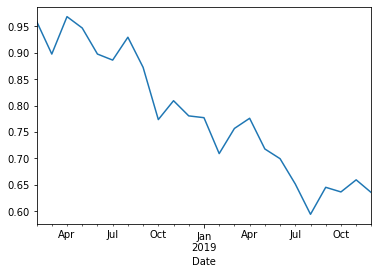

In [36]:
cum_stock_ret.plot()

In [37]:
market_ret = market_price.pct_change().dropna()
market_ret.shape

(23,)

In [38]:
cum_market_ret = pd.DataFrame((market_ret + 1).cumprod())
cum_market_ret.shape

(23, 1)

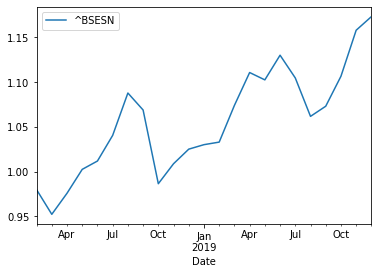

In [39]:
cum_market_ret.plot()

In [40]:
cum_ret_all = pd.DataFrame(cum_market_ret.copy())
cum_ret_all['portfolio return'] = (sum_all_ret + 1).cumprod()
cum_ret_all.head()

,^BSESN,portfolio return
Date,,
2018-02-28,0.979926,0.959352
2018-03-31,0.952383,0.897369
2018-04-30,0.975886,0.968102
2018-05-31,1.002576,0.946624
2018-06-30,1.011882,0.897397


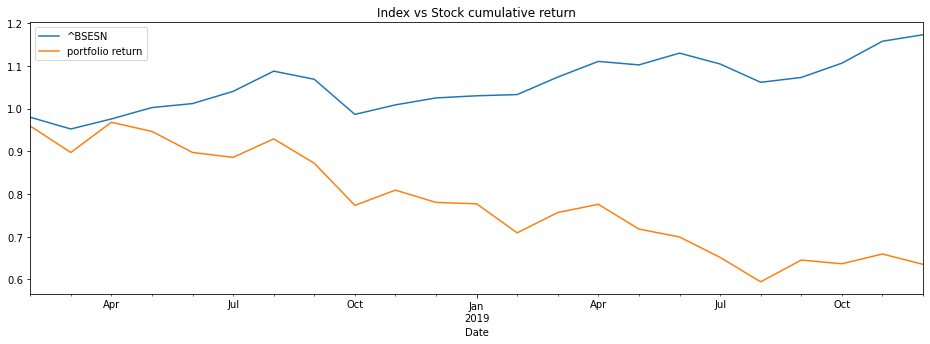

In [41]:
cum_ret_all.plot(figsize = (16,5), title = "Index vs Stock cumulative return")

In [42]:
def performance_extremes(stats):
    extremes = pd.concat((stats.idxmin(),stats.min(),stats.idxmax(),stats.max()),axis=1)
    extremes.columns = ['Minimizer','Minimum','Maximizer','Maximum']
    return extremes
extremes = performance_extremes(stats)
extremes

,Minimizer,Minimum,Maximizer,Maximum
Mean return,PRAKASH.NS,-1.000000,VIPIND.NS,7.568100
Standard deviation,TCPLPACK.NS,0.181591,DENORA.NS,0.626722
Total return,PRAKASH.NS,-0.766397,VIPIND.NS,0.212869


growth = (cl_price_ret + 1).cumprod()
tx = growth.index
syms = growth.columns
esyms = list(pd.concat((extremes.Minimizer, extremes.Maximizer)).drop_duplicates())
def performance_multiline(data, esyms, legend=False):
    fig = figure(x_axis_type='datetime')
    fig.plot_width = 900
    fig.plot_height = 400
    growth = (cl_price_ret + 1).cumprod()
    source = ColumnDataSource(growth)
    from bokeh.palettes import all_palettes
    from bokeh.palettes import Category20
    line_colors = all_palettes['Category20'][len(esyms)+1]
    # Lines
    legend_text = None
    for symb in data.columns:
        if symb in esyms:
            alpha, lwid, color = 1, 2, line_colors.pop()
            if legend: legend_text = ' ' + symb
        else:
            alpha, lwid, color, legend_text = 0.2, 1, line_colors[0], None,
            alpha, lwid, color = 0.2, 1, line_colors[0]
        r = fig.line('Date', symb, color=color, alpha=alpha, line_width=lwid,
                     legend=legend_text, source=source)
        hover = HoverTool(renderers=[r], tooltips=[(symb, '(@Date{%F}, @' + symb + ')')],
                          formatters={'Date': 'datetime'}, toggleable=False)
        fig.add_tools(hover)
    # Text
    if not legend:
        fig.text(growth.index[-1], growth.iloc[-1],
                 syms, alpha=0.25 + 0.55 * syms.isin(esyms),
                 text_font_size='10px')
    #fig.yaxis[0].formatter = NumeralTickFormatter(format="0%")
    if legend:
        fig.legend.orientation='vertical'
        fig.legend.location='top_left'
    return fig
show(performance_multiline(cl_price_ret, esyms))

In [43]:
def performance_scatter(stats, **kwargs):
    fig = figure(**kwargs)
    fig.plot_width = 900
    fig.plot_height = 400
    source = ColumnDataSource(stats)
    hover = HoverTool(tooltips=[('Symbol','@index'),
                                ('Standard deviation','@{Standard deviation}'),
                                ('Mean return','@{Mean return}')])
    fig.add_tools(hover)
    fig.circle('Standard deviation', 'Mean return', size=8, color='maroon', source=source, hover_fill_color='grey')
    fig.text('Standard deviation', 'Mean return', 'index', text_font_size='10px', x_offset=4, y_offset=-2, source=source)
    fig.xaxis.axis_label='Volatility (standard deviation)'
    fig.yaxis.axis_label='Mean return'
    fig.xaxis[0].formatter = NumeralTickFormatter(format="0.0%")
    fig.yaxis[0].formatter = NumeralTickFormatter(format="0.0%")
    return fig
show(performance_scatter(stats))

In [44]:
corr = (cl_price_ret / cl_price_ret.shift()).corr()
corr.head()

,TATACONSUM.NS,HAVELLS.NS,VIPIND.NS,GNA.NS,PAGEIND.NS,UNIONBANK.NS,DENORA.NS,ORIENTBELL.NS,TCPLPACK.NS,RADICO.NS,POLYMED.NS,SHALPAINTS.NS,EXIDEIND.NS,CIGNITITEC.NS,GUFICBIO.NS,AUTOIND.NS,PRAKASH.NS,CENTURYPLY.NS,DEEPAKFERT.NS
TATACONSUM.NS,1.000000,0.566334,0.027935,0.094831,-0.101809,-0.681723,-0.025539,0.007314,0.133132,0.023771,-0.020804,0.005175,0.517054,-0.082483,0.067364,-0.030645,-0.061798,0.041300,-0.042028
HAVELLS.NS,0.566334,1.000000,0.055451,-0.031888,-0.111560,-0.485787,0.089253,0.035897,-0.133100,0.127024,-0.083498,0.038527,0.315285,-0.137673,-0.262762,-0.039343,0.094284,0.057977,-0.063835
VIPIND.NS,0.027935,0.055451,1.000000,-0.005274,0.067938,-0.002541,-0.445461,0.084388,-0.024439,-0.107021,0.301550,-0.017864,0.033862,0.086880,-0.091441,-0.085340,0.040195,-0.073499,0.031671
GNA.NS,0.094831,-0.031888,-0.005274,1.000000,-0.459287,0.073107,0.061797,0.634329,0.430905,-0.132308,0.390209,0.180979,0.304162,-0.496976,-0.026840,-0.282785,0.163557,0.296661,0.103529
PAGEIND.NS,-0.101809,-0.111560,0.067938,-0.459287,1.000000,-0.110679,0.036894,-0.258222,0.054806,0.179621,-0.152274,-0.056205,-0.203394,0.131968,0.710164,0.077430,-0.577673,-0.414952,-0.067029


In [45]:
def correlation_scatter(corr):
    nsym = len(corr)
    dsyms = corr.columns.values
    x = np.broadcast_to(dsyms[:, None], (nsym, nsym)).ravel()
    y = np.broadcast_to(dsyms[None, :], (nsym, nsym)).ravel()
    z = corr.values.ravel()
    c = np.where(z < 0, 'red', 'blue')
    a = np.where(x == y, 0.1, 0.8)
    source = ColumnDataSource({'x': x, 'y': y, 'z': z, 'r': z / 2, 'color': c, 'alpha': a})
    fig = figure(x_range=dsyms, y_range=dsyms[::-1])
    fig.add_tools(HoverTool(tooltips='(@y,@x): @z'))
    fig.scatter('x', 'y', radius='r', fill_color='color', alpha='alpha', source=source)
    fig.xaxis.major_label_orientation = pi / 4
    return fig
show(correlation_scatter(corr))

In [46]:
Sigma = cl_price_ret.cov()*256
Sigma.head()
data = cl_price_ret.copy()

In [47]:
#Sigma.loc[['GTPL.BO','TIDEWATER.NS'],['GTPL.BO','TIDEWATER.NS']]
syms = data.columns
#syms

In [48]:
from gurobipy import *
m = Model()
#create one variable for each stock
portvars = [m.addVar(name = symb, lb = 0.0) for symb in syms]
portvars = pd.Series(portvars, index = syms)
portfolio = pd.DataFrame({'Variable' : portvars})
m.update()
#portfolio


--------------------------------------------
--------------------------------------------

Using license file C:\Users\Meekey\gurobi.lic
Academic license - for non-commercial use only - expires 2020-12-03


In [49]:
#total budget
p_total = portvars.sum()

#p_total

In [50]:
#portfolio mean return
p_return = stats['Mean return'].dot(portvars)
#p_return

In [51]:
weights

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [52]:

#squqred volatility of portfolio
#Sigma = (cl_price_ret/cl_price_ret.shift()).cov()
#Sigma = (grb_cl_price_ret).cov()
p_risk = Sigma.dot(portvars).dot(portvars)
#p_risk

In [53]:
#Set objective function : minimize risk
m.setObjective(p_risk, GRB.MINIMIZE)
#fix budget
m.addConstr(p_total, GRB.EQUAL, 1)
#m.addConstr(p_total == 1)
#select simplex algorithm
m.setParam('Method', 1)

m.optimize()

Changed value of parameter Method to 1
   Prev: -1  Min: -1  Max: 5  Default: -1
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 19 columns and 19 nonzeros
Model fingerprint: 0xa7154560
Model has 190 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-02, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.06s
Presolved: 1 rows, 19 columns, 19 nonzeros
Presolved model has 190 quadratic objective terms

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s
       9    2.8853704e-01   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.07 seconds
Optimal objective  2.885370439e-01


In [54]:
portfolio['Minimum Risk'] = portvars.apply(lambda x:x.getAttr('x'))
#portfolio['Minimum Risk']

In [55]:
portfolio['Minimum Risk']

TATACONSUM.NS    0.374472
HAVELLS.NS       0.048692
VIPIND.NS        0.000000
GNA.NS           0.000000
PAGEIND.NS       0.000000
UNIONBANK.NS     0.000000
DENORA.NS        0.063125
ORIENTBELL.NS    0.000000
TCPLPACK.NS      0.069054
RADICO.NS        0.122142
POLYMED.NS       0.247100
SHALPAINTS.NS    0.000000
EXIDEIND.NS      0.000000
CIGNITITEC.NS    0.075415
GUFICBIO.NS      0.000000
AUTOIND.NS       0.000000
PRAKASH.NS       0.000000
CENTURYPLY.NS    0.000000
DEEPAKFERT.NS    0.000000
Name: Minimum Risk, dtype: float64

In [56]:
ret50 = 0.5 * extremes.loc['Mean return','Maximum']
fixreturn = m.addConstr(p_return == ret50)
m.update()
m.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2 rows, 19 columns and 38 nonzeros
Model has 190 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-01, 8e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-02, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8853704e-01   0.000000e+00   0.000000e+00      0s
       5    5.0865315e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.03 seconds
Optimal objective  5.086531520e-01


In [57]:
portfolio['50% Max Return'] = portvars.apply(lambda x:x.getAttr('x'))
portfolio['50% Max Return']

TATACONSUM.NS    0.333810
HAVELLS.NS       0.595547
VIPIND.NS        0.000000
GNA.NS           0.000000
PAGEIND.NS       0.000000
UNIONBANK.NS     0.000000
DENORA.NS        0.064863
ORIENTBELL.NS    0.000000
TCPLPACK.NS      0.000000
RADICO.NS        0.000000
POLYMED.NS       0.005779
SHALPAINTS.NS    0.000000
EXIDEIND.NS      0.000000
CIGNITITEC.NS    0.000000
GUFICBIO.NS      0.000000
AUTOIND.NS       0.000000
PRAKASH.NS       0.000000
CENTURYPLY.NS    0.000000
DEEPAKFERT.NS    0.000000
Name: 50% Max Return, dtype: float64

In [58]:
portfolio['Maximum Return'] = [1.0 if x == extremes["Maximizer"]["Mean return"] else 0.0 for x in syms]
#portfolio['Maximum Risk']

In [59]:
portfolio

,Variable,Minimum Risk,50% Max Return,Maximum Return
TATACONSUM.NS,<gurobi.Var TATACONSUM.NS (value 0.33381046253...,0.374472,0.333810,0.0
HAVELLS.NS,<gurobi.Var HAVELLS.NS (value 0.59554741211764...,0.048692,0.595547,0.0
VIPIND.NS,<gurobi.Var VIPIND.NS (value 0.0)>,0.000000,0.000000,1.0
GNA.NS,<gurobi.Var GNA.NS (value 0.0)>,0.000000,0.000000,0.0
PAGEIND.NS,<gurobi.Var PAGEIND.NS (value 0.0)>,0.000000,0.000000,0.0
UNIONBANK.NS,<gurobi.Var UNIONBANK.NS (value 0.0)>,0.000000,0.000000,0.0
DENORA.NS,<gurobi.Var DENORA.NS (value 0.064863334121402...,0.063125,0.064863,0.0
ORIENTBELL.NS,<gurobi.Var ORIENTBELL.NS (value 0.0)>,0.000000,0.000000,0.0
TCPLPACK.NS,<gurobi.Var TCPLPACK.NS (value 0.0)>,0.069054,0.000000,0.0
RADICO.NS,<gurobi.Var RADICO.NS (value 0.0)>,0.122142,0.000000,0.0


In [60]:
fig = figure(x_axis_type = 'datetime', y_axis_type = 'log', tools = "pan, box_zoom, reset, save")
pgrowth = cl_price_ret.dot(portfolio.loc[:,'Minimum Risk':'Maximum Return'])
pgrowth = (pgrowth + 1).cumprod()

for (t, c) in zip(['Minimum Risk', '50% Max Return', 'Maximum Return'],['red', 'green', 'blue']):
    fig.line(pgrowth.index, pgrowth[t], legend = t, color = c)

fig.y_range = Range1d(1.0, 1.1 * pgrowth.max().max())
show(fig)

In [61]:
stats
#stats.loc[riskret, 'Mean return']
extremes.loc['Standard deviation','Minimizer']

'TCPLPACK.NS'

In [62]:
stats

,Mean return,Standard deviation,Total return
TATACONSUM.NS,0.259428,0.219664,0.020939
HAVELLS.NS,6.324975,0.233076,0.195907
VIPIND.NS,7.568100,0.397336,0.212869
GNA.NS,-0.997400,0.326001,-0.414198
PAGEIND.NS,-0.167793,0.280889,-0.016367
UNIONBANK.NS,-0.999958,0.392765,-0.595512
DENORA.NS,-0.986823,0.626722,-0.322236
ORIENTBELL.NS,-0.999949,0.262564,-0.588423
TCPLPACK.NS,-0.999976,0.181591,-0.615147
RADICO.NS,-0.650592,0.305583,-0.090147


In [63]:
#Sigma.values

In [64]:
import cvxopt
import quandl
from math import sqrt, log, pi

In [65]:
r = stats['Mean return'].values
cvxopt.solvers.options['abstol'] = cvxopt.solvers.options['reltol'] = cvxopt.solvers.options['feastol'] = 1e-8
n = cl_price_ret.shape[1]
P = 2 * cvxopt.matrix(Sigma.values)
q = cvxopt.matrix(np.zeros(n))
G = cvxopt.matrix(-np.eye(n,n))
h = cvxopt.matrix(np.zeros(n))
A = cvxopt.matrix(np.ones((1,n)))
b = cvxopt.matrix(np.ones(1))
solution = cvxopt.solvers.qp(P, q, G, h, A, b)
sol_x = np.array(solution['x'])[:,0]
sol_x *= (sol_x > 1e-4)
min_risk = sol_x / sol_x.sum()

     pcost       dcost       gap    pres   dres
 0:  1.1646e-01 -9.0746e-01  3e+01  5e+00  6e+00
 1:  2.5009e-01 -6.0980e-01  2e+00  2e-01  3e-01
 2:  3.6252e-01  1.1960e-01  3e-01  4e-03  5e-03
 3:  3.0689e-01  2.7220e-01  4e-02  4e-04  5e-04
 4:  2.9100e-01  2.8722e-01  4e-03  1e-05  1e-05
 5:  2.8880e-01  2.8848e-01  3e-04  5e-07  6e-07
 6:  2.8854e-01  2.8854e-01  7e-06  5e-09  6e-09
 7:  2.8854e-01  2.8854e-01  7e-08  5e-11  6e-11
 8:  2.8854e-01  2.8854e-01  7e-10  5e-13  6e-13
Optimal solution found.


In [66]:
# Turn off CVXOPT's output
cvxopt.solvers.options['show_progress'] = False

# Determine the range of returns. Make sure to include the lowest-risk
# portfolio in the list of options
minret = extremes.loc['Mean return','Minimum']
maxret = extremes.loc['Mean return','Maximum']
riskret = extremes.loc['Standard deviation','Minimizer']
riskret = stats.loc[riskret, 'Mean return']
returns = np.unique(np.hstack((np.linspace(minret,maxret,200),riskret)))[::-1]

# Iterate through all returns
risks = returns.copy()
port_data = np.zeros((len(returns), n))
for k in range(len(returns)):
    A = cvxopt.matrix(np.vstack([np.ones(n), r]))
    b = cvxopt.matrix([1, returns[k]])
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    sol_x = np.array(solution['x'])[:,0]
    sol_x = np.array(solution['x'])[:,0]
    sol_x *= (sol_x > 1e-4)
    sol_x /= sol_x.sum()
    port_data[k] = sol_x
    risks[k] = np.sqrt(Sigma.dot(sol_x).dot(sol_x))

port_data = pd.DataFrame(port_data.T, columns=[str(x) for x in range(len(returns))], index=syms)

In [67]:
psource = port_data[port_data.any(axis=1)].copy()
psource['_top'] = psource.iloc[:, 0]
#psource['_top']

In [68]:
temp = pd.read_csv("C:\\Users\\Meekey\\Documents\\CAPM\\temp.csv")
temp = temp.drop(['^BSESN'], axis = 1)
temp  = temp.tail(1)
temp = temp.drop(['Date'], axis = 1)
temp.T

,226
BAJFINANCE.NS,4908.799805
BAJAJFINSV.NS,8758.799805
ASIANPAINT.NS,2215.300049
PIDILITIND.NS,1542.550049
KOTAKBANK.NS,1907.099976
HINDUNILVR.NS,2138.199951
TCS.NS,2679.649902
INFY.NS,1100.000000
HCLTECH.NS,822.099976
MANAPPURAM.NS,179.850006


In [69]:

stats2 = stats.copy()
stats2.shape
stats2['CMP'] = temp.T
stats2
stats = stats2.copy()
stats

,Mean return,Standard deviation,Total return,CMP
TATACONSUM.NS,0.259428,0.219664,0.020939,NaN
HAVELLS.NS,6.324975,0.233076,0.195907,NaN
VIPIND.NS,7.568100,0.397336,0.212869,NaN
GNA.NS,-0.997400,0.326001,-0.414198,NaN
PAGEIND.NS,-0.167793,0.280889,-0.016367,NaN
UNIONBANK.NS,-0.999958,0.392765,-0.595512,NaN
DENORA.NS,-0.986823,0.626722,-0.322236,NaN
ORIENTBELL.NS,-0.999949,0.262564,-0.588423,NaN
TCPLPACK.NS,-0.999976,0.181591,-0.615147,NaN
RADICO.NS,-0.650592,0.305583,-0.090147,NaN


In [70]:
#origincal and working code
psource = port_data[port_data.any(axis=1)].copy()
psource['_top'] = psource.iloc[:, 0]
psource = ColumnDataSource(psource)
port = figure(x_range=psource.data['index'], y_range=(0,1), plot_width=450, plot_height=450)
port_bars = port.vbar(x='index', top='_top', width=0.75, bottom=0, source=psource)
port.xaxis.major_label_orientation = pi / 4

# Individual stocks
bullet = figure(title = "{} from {}".format(title,start), plot_width=450, plot_height=450)

bullet.plot_width = 900
bullet.plot_height = 600
bullet.circle('Standard deviation', 'Mean return', size=5, color='maroon', source=stats)
bullet.text('Standard deviation', 'Mean return', 'index', text_font_size='10px',
            x_offset=4, y_offset=-2, source=stats)
bullet.xaxis.axis_label='Volatility (standard deviation)'
bullet.yaxis.axis_label='Mean return'

bullet.xaxis[0].formatter = NumeralTickFormatter(format="0.0%")
bullet.yaxis[0].formatter = NumeralTickFormatter(format="0.0%")

# Divide the efficient frontier into two sections: those with
# a return less than the minimum risk portfolio, those that are greater.
tpos_n = returns >= riskret
tneg_n = returns <= riskret
pline = bullet.line(risks[tpos_n], returns[tpos_n], color='blue')
nline = bullet.line(risks[tneg_n], returns[tneg_n], color='red')
bdots = bullet.circle(risks, returns, alpha=0, size=10)
bullet.add_tools(CrosshairTool(dimensions='width'))
bullet.add_tools(HoverTool(mode='hline', renderers=[pline, nline],
                           tooltips={'Volatility': '$x', 'Return': '$y'}))

def callback(source=psource):
    indices = cb_data.index['1d'].indices;
    if indices.length > 0:
        data = source.data;
        data['_top'] = data[indices[0]]
        source.trigger('change')

#bullet.add_tools(HoverTool(mode='hline', renderers=[bdots], tooltips=None,
#                           callback=CustomJS.from_py_func(callback)))

show(gridplot([[bullet]]))
#save(gridplot([[bullet]]), 
#     filename = 'C:\\Users\\Meekey\\Documents\\CAPM\\Capital Markets\\Stock Analysis\\Analysis on earnings latest quarter 28Sep\\First10Pages.html', 
#     title ="First10Pages")



#save(gridplot([[bullet]]), 
#     filename = 'C:\\Users\\Meekey\\Documents\\CAPM\\Capital Markets\\Stock Analysis\\Analysis on earnings latest quarter 28Sep\\{} from {}_{}.html'.format(title,start,industry), 
     #title ='{} from {}:{}'.format(title,start, industry)
#    )

In [71]:
psource.data['index']

array(['TATACONSUM.NS', 'HAVELLS.NS', 'VIPIND.NS', 'PAGEIND.NS',
       'DENORA.NS', 'ORIENTBELL.NS', 'TCPLPACK.NS', 'RADICO.NS',
       'POLYMED.NS', 'EXIDEIND.NS', 'CIGNITITEC.NS', 'GUFICBIO.NS',
       'AUTOIND.NS', 'PRAKASH.NS', 'DEEPAKFERT.NS'], dtype=object)

In [72]:
#adding tooltip for CMP
psource = port_data[port_data.any(axis=1)].copy()
psource['_top'] = psource.iloc[:, 0]
psource = ColumnDataSource(psource)
port = figure(x_range=psource.data['index'], y_range=(0,1), plot_width=450, plot_height=450)
port_bars = port.vbar(x='index', top='_top', width=0.75, bottom=0, source=psource)
port.xaxis.major_label_orientation = pi / 4

# Individual stocks
bullet = figure(title = "{} from {}".format(title,start), plot_width=450, plot_height=450)

bullet.plot_width = 900
bullet.plot_height = 600
bullet.circle('Standard deviation', 'Mean return', size=5, color='maroon', source=stats)
bullet.text('Standard deviation', 'Mean return', 'index', text_font_size='10px',
            x_offset=4, y_offset=-2, source=stats)
bullet.xaxis.axis_label='Volatility (standard deviation)'
bullet.yaxis.axis_label='Mean return'

bullet.xaxis[0].formatter = NumeralTickFormatter(format="0.0%")
bullet.yaxis[0].formatter = NumeralTickFormatter(format="0.0%")

# Divide the efficient frontier into two sections: those with
# a return less than the minimum risk portfolio, those that are greater.
tpos_n = returns >= riskret
tneg_n = returns <= riskret
pline = bullet.line(risks[tpos_n], returns[tpos_n], color='blue')
nline = bullet.line(risks[tneg_n], returns[tneg_n], color='red')
bdots = bullet.circle(risks, returns, alpha=0, size=10)
bullet.add_tools(CrosshairTool(dimensions='width'))
bullet.add_tools(HoverTool(mode='hline',
                           renderers=[pline, nline],
                           tooltips={'Volatility': '$x', 'Return': '$y'}))

def callback(source=psource):
    indices = cb_data.index['1d'].indices;
    if indices.length > 0:
        data = source.data;
        data['_top'] = data[indices[0]]
        source.trigger('change')

#bullet.add_tools(HoverTool(mode='hline', renderers=[bdots], tooltips=None,
#                           callback=CustomJS.from_py_func(callback)))

show(gridplot([[bullet]]))
#save(gridplot([[bullet]]), 
#     filename = 'C:\\Users\\Meekey\\Documents\\CAPM\\Capital Markets\\Stock Analysis\\Analysis on earnings latest quarter 28Sep\\First10Pages.html', 
#     title ="First10Pages")



#save(gridplot([[bullet]]), 
#     filename = 'C:\\Users\\Meekey\\Documents\\CAPM\\Capital Markets\\Stock Analysis\\Analysis on earnings latest quarter 28Sep\\{} from {}_{}.html'.format(title,start,industry), 
     #title ='{} from {}:{}'.format(title,start, industry)
#    )
